In [142]:
from AOS1_project1 import *

In [19]:
ls

AOS1_project1.ipynb  AOS1_project1.py  data/


In [120]:
def get_pi_hat(pd_serie, z):
    # get the proportion of class z
    c = pd_serie["z"]
    return sum( c == z)/len(pd_serie)

def is_pos_def(x):
    # verify if x is positive definite
    return np.all(np.linalg.eigvals(x) > 0)

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [21]:
synth = pd.read_csv("data/synth.csv")

In [22]:
bcw = pd.read_csv("data/bcw.csv")

In [23]:
pima = pd.read_csv("data/Pima.csv")

In [24]:
spam = pd.read_csv("data/spambase.csv")

In [42]:
len(synth)

1000

In [35]:
synth.mean()

X1   -0.500576
X2    1.073006
z     1.508000
dtype: float64

In [37]:
get_pi_hat(synth, 1)

0.492

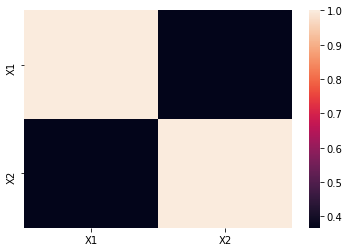

In [61]:
sns.heatmap(synth.drop(columns=["z"]).corr())

In [43]:
len(bcw)

683

In [26]:
bcw.mean()

X1    4.442167
X2    3.150805
X3    3.215227
X4    2.830161
X5    3.234261
X6    3.216691
X7    3.445095
X8    2.869693
X9    1.603221
z     1.349927
dtype: float64

In [39]:
get_pi_hat(bcw, 1)

0.6500732064421669

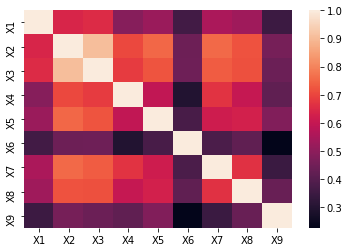

In [63]:
sns.heatmap(bcw.drop(columns=["z"]).corr())

In [44]:
len(pima)

532

In [29]:
pima.mean()

npreg      3.516917
glu      121.030075
bp        71.505639
skin      29.182331
bmi       32.890226
ped        0.502966
age       31.614662
z          1.332707
dtype: float64

In [40]:
get_pi_hat(pima, 1)

0.6672932330827067

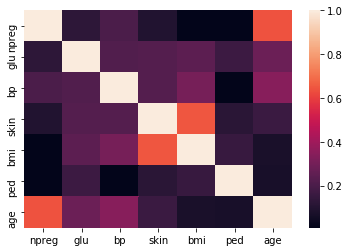

In [64]:
sns.heatmap(pima.drop(columns=["z"]).corr())

In [45]:
len(spam)

4601

In [30]:
spam.mean()

X1       0.104553
X2       0.213015
X3       0.280656
X4       0.065425
X5       0.312223
X6       0.095901
X7       0.114208
X8       0.105295
X9       0.090067
X10      0.239413
X11      0.059824
X12      0.541702
X13      0.093930
X14      0.058626
X15      0.049205
X16      0.248848
X17      0.142586
X18      0.184745
X19      1.662100
X20      0.085577
X21      0.809761
X22      0.121202
X23      0.101645
X24      0.094269
X25      0.549504
X26      0.265384
X27      0.767305
X28      0.124845
X29      0.098915
X30      0.102852
X31      0.064753
X32      0.047048
X33      0.097229
X34      0.047835
X35      0.105412
X36      0.097477
X37      0.136953
X38      0.013201
X39      0.078629
X40      0.064834
X41      0.043667
X42      0.132339
X43      0.046099
X44      0.079196
X45      0.301224
X46      0.179824
X47      0.005444
X48      0.031869
X49      0.038575
X50      0.139030
X51      0.016976
X52      0.269071
X53      0.075811
X54      0.044238
X55      5.191515
X56     52

In [41]:
get_pi_hat(spam, 1)

0.39404477287546186

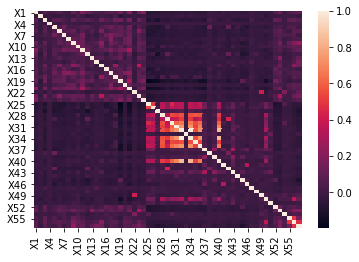

In [65]:
sns.heatmap(spam.drop(columns=["z"]).corr())

In [13]:
%run AOS1_project1.py

accuracy:
 0.9566666666666667
confusion_matrix:
 [[131   6]
 [  7 156]]


In [183]:
data = pd.read_csv("data/spambase.csv")
y = data.z.to_numpy()
X = data.drop(columns=["z"]).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=30)
gda = GDA()
gda.fit(X_train, y_train)
y_pred = gda.predict(X_test)
print(f'accuracy:\n {accuracy_score(y_test, y_pred)}')
print(f'confusion_matrix:\n {confusion_matrix(y_test, y_pred)}')

accuracy:
 0.8117306299782766
confusion_matrix:
 [[474  44]
 [216 647]]


In [186]:
y_pred

array([1, 2, 1, ..., 2, 1, 1])

In [ ]:
cov1 = gda.show_params()["sigma_hat_1"]

In [119]:
cov1

array([[8.91914638e-02, 1.23384686e-02, 1.09741201e-02, ...,
        8.69426332e-01, 4.79076116e+00, 2.62237802e+01],
       [1.23384686e-02, 1.35536679e-01, 1.19954852e-02, ...,
        7.96619465e-01, 7.64792231e+00, 1.01165662e+01],
       [1.09741201e-02, 1.19954852e-02, 2.41120416e-01, ...,
        4.28226679e+00, 1.86441407e+01, 2.30457435e+01],
       ...,
       [8.69426332e-01, 7.96619465e-01, 4.28226679e+00, ...,
        3.42594673e+03, 9.60456018e+03, 8.29007306e+03],
       [4.79076116e+00, 7.64792231e+00, 1.86441407e+01, ...,
        9.60456018e+03, 1.15278844e+05, 1.42347698e+05],
       [2.62237802e+01, 1.01165662e+01, 2.30457435e+01, ...,
        8.29007306e+03, 1.42347698e+05, 7.58032230e+05]])

In [121]:
is_pos_def(cov1)

True

In [122]:
check_symmetric(cov1)

True

In [178]:
def run_RGDA_prediction(data_path):
    data = pd.read_csv(data_path)
    y = data.z.to_numpy()
    X = data.drop(columns=["z"]).to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=30)
    d = X.shape[1]
    mu = 0
    kappa = 1
    Lambda = np.eye(d)
    rgba = RGDA(mu, kappa, Lambda)
    rgba.fit(X_train, y_train)
    y_pred = rgba.predict(X_test)
    print(f'accuracy:\n {accuracy_score(y_test, y_pred)}')
    print(f'confusion_matrix:\n {confusion_matrix(y_test, y_pred)}')

In [179]:
run_RGDA_prediction("data/synth.csv")

accuracy:
 0.9566666666666667
confusion_matrix:
 [[131   6]
 [  7 156]]


In [117]:
data = pd.read_csv("data/synth.csv")
y = data.z.to_numpy()
X = data.drop(columns=["z"]).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=30)
d = X.shape[1]
mu = 0
kappa = 1
Lambda = np.eye(d)
rgba = RGDA(mu, kappa, Lambda)
rgba.fit(X_train, y_train)

In [118]:
rgba.show_params()

mu_hat_1: [-1.93993135 -0.88176998]
mu_hat_2: [0.95535055 2.92535707]        
sigma_hat_1:
[[1.92767322 0.8910512 ]
 [0.8910512  2.79236171]]
sigma_hat_2:
[[ 4.22148467 -2.21435403]
 [-2.21435403  3.04048789]]


# Result Analysis

## synth.csv

In [25]:
y = synth.z.to_numpy()
X = synth.drop(columns=["z"]).to_numpy()

### GDA: Gaussian Discriminant Analysis

In [170]:
r = cross_validate(GDA(), X, y, 
               scoring = 'accuracy', return_train_score=True)
print(f"mean_fit_time: {mean(r['fit_time'])}\nmean_score_time: {mean(r['score_time'])}\nmean_train_score: {mean(r['test_score'])}\nmean_test_score: {mean(r['train_score'])}")
r

mean_fit_time: 0.0002537250518798828
mean_score_time: 0.000632476806640625
mean_train_score: 0.962
mean_test_score: 0.9627500000000001


{'fit_time': array([0.00047588, 0.00023508, 0.00026965, 0.00016022, 0.00012779]),
 'score_time': array([0.00080538, 0.00079036, 0.00068092, 0.00046706, 0.00041866]),
 'test_score': array([0.96 , 0.96 , 0.965, 0.98 , 0.945]),
 'train_score': array([0.9625 , 0.96375, 0.96375, 0.9575 , 0.96625])}

### QLR: Quadratic Logistic Regression model

In [178]:
r = cross_validate(RQLR('none', solver='newton-cg'), X, y, 
               scoring = 'accuracy', return_train_score=True)
print(f"mean_fit_time: {mean(r['fit_time'])}\nmean_score_time: {mean(r['score_time'])}\nmean_train_score: {mean(r['test_score'])}\nmean_test_score: {mean(r['train_score'])}")
r

mean_fit_time: 0.011944293975830078
mean_score_time: 0.0005101203918457031
mean_train_score: 0.962
mean_test_score: 0.96675


{'fit_time': array([0.01287532, 0.01637459, 0.01058865, 0.01101494, 0.00886798]),
 'score_time': array([0.00059724, 0.00063443, 0.00051212, 0.00039768, 0.00040913]),
 'test_score': array([0.985, 0.975, 0.97 , 0.94 , 0.94 ]),
 'train_score': array([0.96125, 0.965  , 0.965  , 0.97125, 0.97125])}

### RGDA: regularized Gaussian Discriminant Analysis

In [172]:
mu = 0
kappa = 1
Lambda = np.eye(d)
r = cross_validate(RGDA(mu, kappa, Lambda), X, y, 
               scoring = 'accuracy', return_train_score=True)
print(f"mean_fit_time: {mean(r['fit_time'])}\nmean_score_time: {mean(r['score_time'])}\nmean_train_score: {mean(r['test_score'])}\nmean_test_score: {mean(r['train_score'])}")
r

mean_fit_time: 0.00031261444091796876
mean_score_time: 0.0005307197570800781
mean_train_score: 0.962
mean_test_score: 0.9622499999999998


{'fit_time': array([0.00055695, 0.00026011, 0.00025678, 0.00024581, 0.00024343]),
 'score_time': array([0.00060129, 0.00059557, 0.00051999, 0.00046968, 0.00046706]),
 'test_score': array([0.96 , 0.96 , 0.965, 0.98 , 0.945]),
 'train_score': array([0.9625 , 0.96375, 0.9625 , 0.95625, 0.96625])}

### RQLR: Regularized Quadratic Logistic Regression model

In [28]:
r = cross_validate(RQLR('elasticnet', 'saga', l1_ratio=0.5), X, y, 
               scoring = 'accuracy', return_train_score=True)
print(f"mean_fit_time: {mean(r['fit_time'])}\nmean_score_time: {mean(r['score_time'])}\nmean_train_score: {mean(r['test_score'])}\nmean_test_score: {mean(r['train_score'])}")
r

mean_fit_time: 0.06748642921447753
mean_score_time: 0.0004734992980957031
mean_train_score: 0.9630000000000001
mean_test_score: 0.9652499999999999


{'fit_time': array([0.05231071, 0.05657458, 0.08228111, 0.05449533, 0.09177041]),
 'score_time': array([0.00050664, 0.0004611 , 0.00046301, 0.00046349, 0.00047326]),
 'test_score': array([0.98 , 0.975, 0.975, 0.94 , 0.945]),
 'train_score': array([0.95875, 0.965  , 0.9625 , 0.97125, 0.96875])}

# model comparison on different datasets

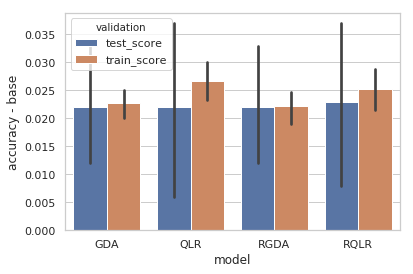

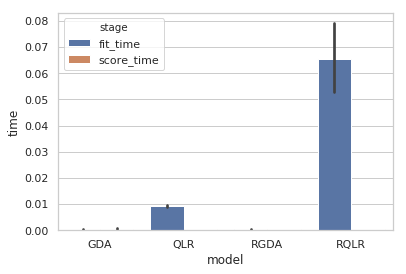

In [127]:
df_synth = models_comparison("data/synth.csv", "synth")

In [151]:
df_synth.groupby('model').mean()

,fit_time,score_time,test_score,train_score
model,,,,
GDA,0.000272,0.000570,0.962,0.96275
QLR,0.009408,0.000394,0.962,0.96675
RGDA,0.000325,0.000473,0.962,0.96225
RQLR,0.065319,0.000392,0.963,0.96525


/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.conda/envs/UBS/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yunfei/.conda/envs/UBS/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yunfei/.conda/envs/UBS/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/yunfei/.conda/envs/UBS/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


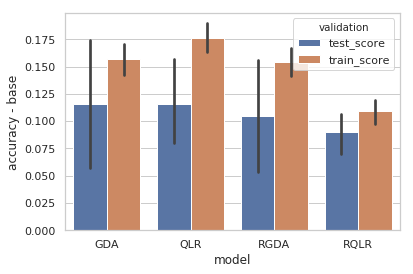

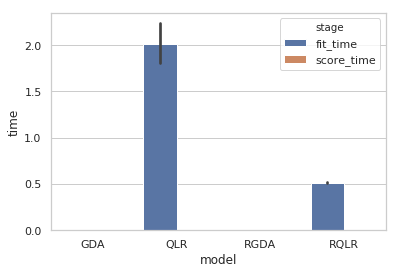

In [132]:
df_pima = models_comparison("data/Pima.csv", "Pima")

In [133]:
df_pima.groupby('model').mean()

,fit_time,score_time,test_score,train_score
model,,,,
GDA,0.000344,0.000801,0.748051,0.788524
QLR,2.015405,0.000562,0.748193,0.808278
RGDA,0.001624,0.000642,0.736784,0.786173
RQLR,0.513949,0.000712,0.721813,0.741551


/home/yunfei/.conda/envs/UBS/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


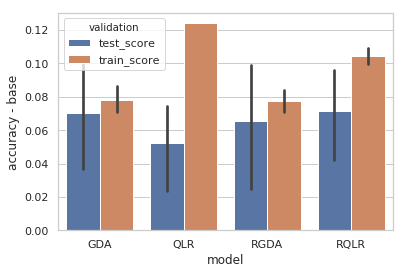

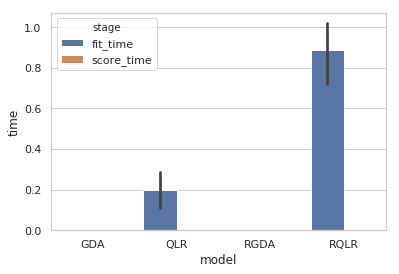

In [136]:
df_bcw = models_comparison("data/bcw.csv", "bcw")

In [137]:
df_bcw.groupby('model').mean()

,fit_time,score_time,test_score,train_score
model,,,,
GDA,0.000311,0.000734,0.945921,0.954252
QLR,0.198314,0.000593,0.928306,1.000000
RGDA,0.000395,0.000667,0.941541,0.953519
RQLR,0.887870,0.000573,0.947381,0.980604


/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yunfei/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not c

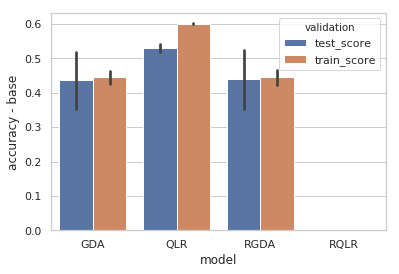

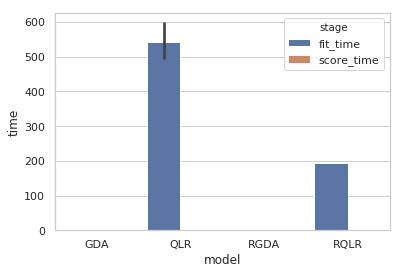

In [138]:
df_spambase = models_comparison("data/spambase.csv", "spam")

In [226]:
df_spambase.groupby('model').mean()

,fit_time,score_time,test_score,train_score
model,,,,
GDA,0.006265,0.021892,0.828271,0.837207
QLR,542.425780,0.008111,0.921759,0.992611
RGDA,0.020957,0.009703,0.831312,0.837859
RQLR,194.492422,0.005932,0.393827,0.394099


# Draw decision boundary for synth

In [190]:
y = synth.z.to_numpy()
X = synth.drop(columns=["z"]).to_numpy()

## GDA boundary

In [213]:
gda = GDA()
gda.fit(X, y)

/home/yunfei/.conda/envs/UBS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


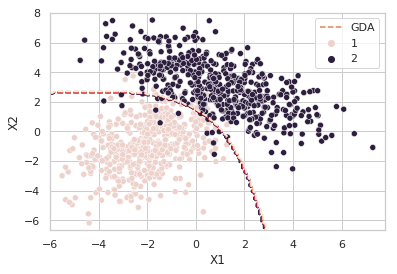

In [215]:
plot_gda_boundry(gda, "GDA", synth)

## QLR boundry

/home/yunfei/.conda/envs/UBS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


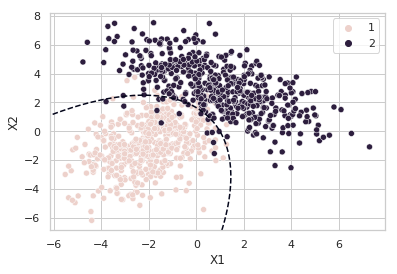

In [222]:
qlr = RQLR('none', solver='newton-cg')
qlr.fit(X, y)
sns.scatterplot(x="X1", y="X2", data=synth, hue="z")
add_decision_boundary(qlr)

## RGDA boundary

/home/yunfei/.conda/envs/UBS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


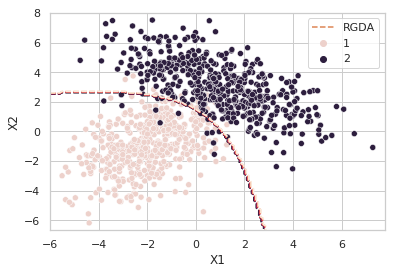

In [211]:
d = X.shape[1]
mu = 0
kappa = 1
Lambda = np.eye(d)
rgda = RGDA(mu, kappa, Lambda)
rgda.fit(X, y)
plot_gda_boundry(rgda, "RGDA", synth)

## RQLR boundry

/home/yunfei/.conda/envs/UBS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


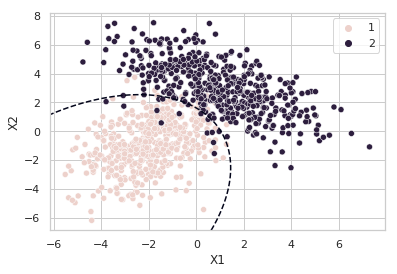

In [225]:
rqlr = RQLR('elasticnet', 'saga', l1_ratio=0.5)
rqlr.fit(X, y)
sns.scatterplot(x="X1", y="X2", data=synth, hue="z")
add_decision_boundary(rqlr)